# Simple Stock Charts

## Types of Stock Charts

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf

In [28]:
# input
symbol = 'AAPL'
start = '2018-12-01'
end = '2024-08-20'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600
2024-08-15,224.600006,225.350006,222.759995,224.720001,224.720001,46414000
2024-08-16,223.919998,226.830002,223.649994,226.050003,226.050003,44289900


## Line Charts

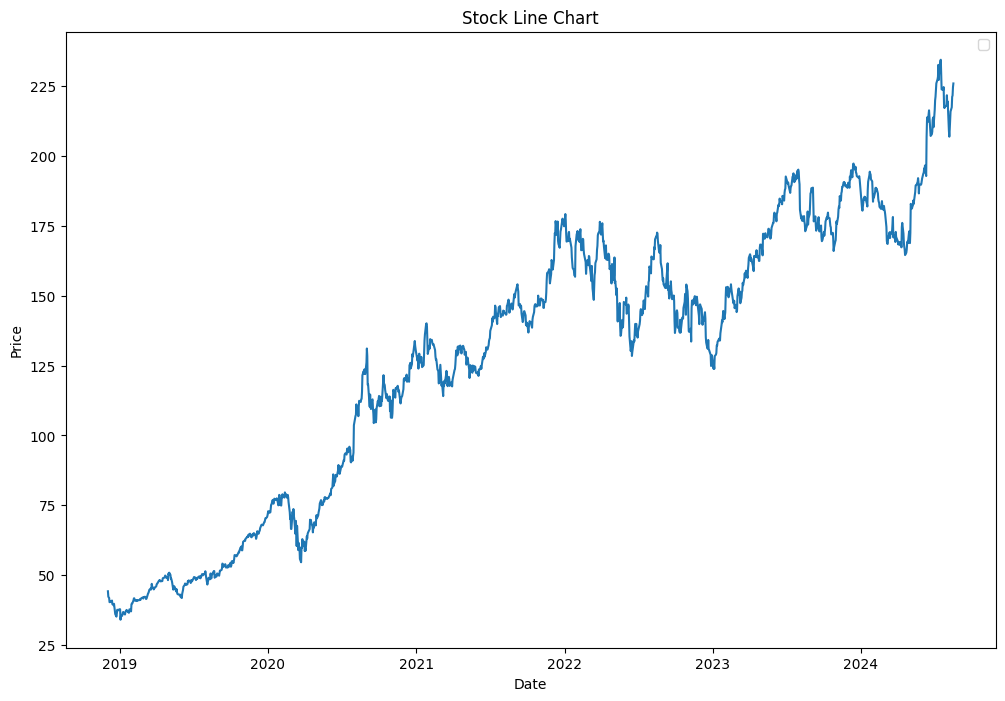

In [29]:
plt.figure(figsize=(12,8))
plt.plot(df['Adj Close'])
plt.title("Stock Line Chart")
plt.legend(loc='best')
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

## High Low Close Bar Stock Chart (HLC)

https://stackoverflow.com/questions/44810875/how-to-draw-a-classic-stock-chart-with-matplotlib

## Open High Low Close Bar Stock Chart (OHLC)

In [30]:
# import plotly.plotly as py
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Plot OHLC Bar Chart
trace = go.Ohlc(x=df['12-2023'].index,
                open=df['12-2023'].Open,
                high=df['12-2023'].High,
                low=df['12-2023'].Low,
                close=df['12-2023'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

KeyError: '12-2018'

In [ ]:
py.iplot(data)

## Japanese Candlesticks Charts

Learn about candlestick:

https://www.quantinsti.com/blog/candlestick-patterns-meaning

https://www.investopedia.com/trading/candlestick-charting-what-is-it/

In [ ]:
from mpl_finance import candlestick_ohlc
from matplotlib import dates as mdates
import datetime as dt

In [ ]:
# Converting date to pandas datetime format
dfc = df.copy()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

In [ ]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

In [ ]:
# Plot Candlestick Chart
trace = go.Candlestick(x=df['12-2018'].index,
                open=df['12-2018'].Open,
                high=df['12-2018'].High,
                low=df['12-2018'].Low,
                close=df['12-2018'].Close)

data = [trace]
iplot(data, filename='simple_ohlc')

## Point and Figure Chart

https://github.com/pviglucci/pypf

In [ ]:
from pypf.chart import PFChart
from pypf.instrument import YahooSecurity
i = YahooSecurity(symbol, force_download, force_cache, period, debug)
c = PFChart(i, box_size, duration, interval, method, reversal, style, trend_lines, debug)
c.create_chart()
print(c.chart)

## Market Profile Stock Charts

https://github.com/bfolkens/py-market-profile

In [ ]:
from market_profile import MarketProfile

In [ ]:
mp = MarketProfile(df, tick_size=1)
mp_slice = mp[df.index.max() - pd.Timedelta(6.5, 'd'):df.index.max()]

In [ ]:
data = mp_slice.profile
data.plot(kind='bar')